In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd

2023-09-17 00:26:52.487421: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dataset = pd.read_csv('/Users/janhavidalal/.keras/datasets/reviews.csv')

In [3]:
sentences = dataset['text'].tolist()

labels = dataset['sentiment'].tolist()
training_size = int(len(sentences)*0.8)
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

vocab_size = 500
embedding_dim = 16
max_length = 50
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [4]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)


testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

2023-09-17 00:28:50.379179: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 8,109
Trainable params: 8,109
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 30
history = model.fit(training_padded,training_labels_final,epochs=num_epochs,validation_data=(testing_padded,testing_labels_final))

Epoch 1/30
50/50 [==============================] - 1s 5ms/step - loss: 0.6921 - accuracy: 0.5242 - val_loss: 0.6968 - val_accuracy: 0.4110
Epoch 2/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5229 - val_loss: 0.6977 - val_accuracy: 0.4160
Epoch 3/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5330 - val_loss: 0.6953 - val_accuracy: 0.4386
Epoch 4/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.5731 - val_loss: 0.6915 - val_accuracy: 0.4762
Epoch 5/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6728 - accuracy: 0.5982 - val_loss: 0.6800 - val_accuracy: 0.5539
Epoch 6/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6609 - accuracy: 0.6598 - val_loss: 0.6659 - val_accuracy: 0.6516
Epoch 7/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6449 - accuracy: 0.7075 - val_loss: 0.6574 - val_accuracy: 0.6316
Epoch 8/30
50/50 [==

In [8]:
import matplotlib.pyplot as plt
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel('string')
    plt.legend([string,'val_'+string])
    plt.show()

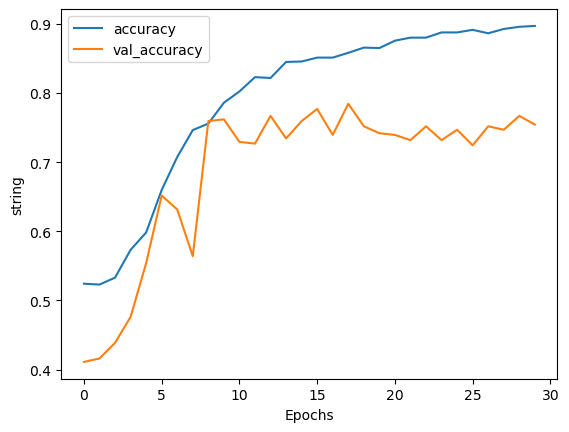

In [9]:
plot_graphs(history,'accuracy')

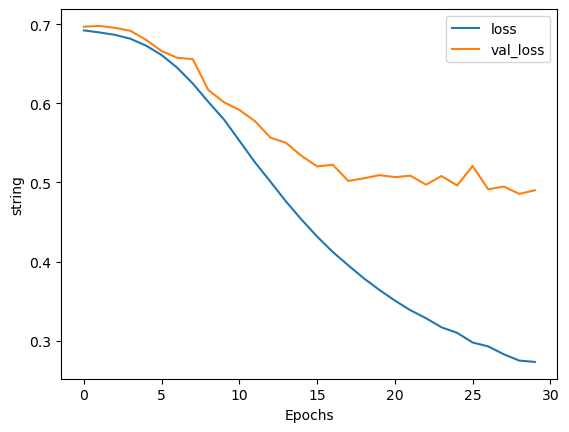

In [10]:
plot_graphs(history,'loss')